#Importa Bibliotecas

In [3]:
!pip install msgpack_numpy

In [4]:
import sys
sys.path.append('/content/drive/MyDrive/Bolsa')
import gerenciar_arqs as GA

import keras 
import numpy as np

from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Concatenate, Flatten
from keras.models import Model

#Carrega Dados

In [ ]:
# Carrega dados de treino aumentados

g_treino_a, l_treino_a = GA.carrega_treino_aumentado()
X_g_treino_a, X_l_treino_a, y_treino_a = GA.ajusta_dados(g_treino_a, l_treino_a)

X_g_treino_a_np = np.array(X_g_treino_a)
X_l_treino_a_np = np.array(X_l_treino_a)
y_treino_a = np.array(y_treino_a)

Iniciando leitura dos arquivos de treino aumentado.
Arquivos de treino aumentado globais lidos.
Arquivos de treino aumentado locais lidos.


In [5]:
# Carrega dados de validação
g_val, l_val = GA.carrega_val()

X_g_val, X_l_val, y_val = GA.ajusta_dados(g_val, l_val)

X_g_val_np = np.array(X_g_val)
X_l_val_np = np.array(X_l_val)

y_val = np.array(y_val)

Iniciando leitura dos arquivos de validação.
Arquivos de validação globais lidos.
Arquivos de validação locais lidos.
Iniciando leitura dos arquivos de teste.
Arquivos de teste globais lidos.
Arquivos de teste locais lidos.


In [ ]:
# Carrega dados de teste
g_teste, l_teste = GA.carrega_teste()

X_g_teste, X_l_teste, y_teste = GA.ajusta_dados(g_teste, l_teste)

X_g_teste_np = np.array(X_g_teste)
X_l_teste_np = np.array(X_l_teste)

y_teste = np.array(y_teste)

#Treino

In [ ]:
X_g_treino_a_np[0].shape

(2001,)

In [ ]:
# global view input
input_global = Input(shape=(2001,1))
x = Conv1D(16, 5, strides=1, activation='relu')(input_global)
x = Conv1D(16, 5, strides=1, activation='relu')(x)
x = MaxPooling1D(pool_size=5, strides=2)(x)
x = Conv1D(32, 5, strides=1, activation='relu')(x)
x = Conv1D(32, 5, strides=1, activation='relu')(x)
x = MaxPooling1D(pool_size=5, strides=2)(x)
x = Conv1D(64, 5, strides=1, activation='relu')(x)
x = Conv1D(64, 5, strides=1, activation='relu')(x)
x = MaxPooling1D(pool_size=5, strides=2)(x)
x = Conv1D(128, 5, strides=1, activation='relu')(x)
x = Conv1D(128, 5, strides=1, activation='relu')(x)
x = MaxPooling1D(pool_size=5, strides=2)(x)
x = Conv1D(256, 5, strides=1, activation='relu')(x)
x = Conv1D(256, 5, strides=1, activation='relu')(x)
x = MaxPooling1D(pool_size=5, strides=2)(x)

# local view 
input_local = Input(shape=(201,1))
y = Conv1D(16, 5, strides=1, activation='relu')(input_local)
y = Conv1D(16, 5, strides=1, activation='relu')(y)
y = MaxPooling1D(pool_size=7, strides=2)(y)
y = Conv1D(32, 5, strides=1, activation='relu')(y)
y = Conv1D(32, 5, strides=1, activation='relu')(y)
y = MaxPooling1D(pool_size=7, strides=2)(y)

# merge layers for fully connected
xf = Flatten()(x)
yf = Flatten()(y)
z = Concatenate()([xf,yf])
z = Dense(512, activation='relu')(z)
z = Dense(512, activation='relu')(z)
z = Dense(512, activation='relu')(z)
z = Dense(512, activation='relu')(z)

output = keras.layers.Dense(2, activation="softmax", name='saida')(z)

model = Model(inputs=[input_global, input_local], outputs=output)

In [ ]:
#SGDsolver = SGD(lr=0.1, momentum=0.25, decay=0.0001, nesterov=True)
model.compile(loss='SparseCategoricalCrossentropy',
            optimizer='sgd',
            metrics=['accuracy'])

In [ ]:
history = model.fit((X_g_treino_a_np, X_l_treino_a_np), y_treino_a, epochs=15,
                    validation_data=((X_g_val_np, X_l_val_np), y_val))

Epoch 1/15
501/501 [==============================] - 373s 742ms/step - loss: 0.6628 - accuracy: 0.5949 - val_loss: 0.5730 - val_accuracy: 0.7700
Epoch 2/15
501/501 [==============================] - 397s 792ms/step - loss: 0.4700 - accuracy: 0.7714 - val_loss: 0.2926 - val_accuracy: 0.8692
Epoch 3/15
501/501 [==============================] - 371s 740ms/step - loss: 0.3083 - accuracy: 0.8687 - val_loss: 0.2939 - val_accuracy: 0.8724
Epoch 4/15
501/501 [==============================] - 370s 739ms/step - loss: 0.2646 - accuracy: 0.8898 - val_loss: 0.2164 - val_accuracy: 0.9117
Epoch 5/15
501/501 [==============================] - 367s 732ms/step - loss: 0.2484 - accuracy: 0.8995 - val_loss: 0.2214 - val_accuracy: 0.9137
Epoch 6/15
501/501 [==============================] - 367s 734ms/step - loss: 0.2350 - accuracy: 0.9049 - val_loss: 0.2264 - val_accuracy: 0.9059
Epoch 7/15
501/501 [==============================] - 370s 739ms/step - loss: 0.2311 - accuracy: 0.9065 - val_loss: 0.2154 -

In [ ]:
model.save('/content/drive/MyDrive/Bolsa')

#Teste

In [6]:
model = keras.models.load_model('/content/drive/MyDrive/Bolsa')

In [12]:
from sklearn.metrics import precision_score , recall_score
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

y_pred = model.predict((X_g_teste_np, X_l_teste_np))

In [19]:
y_pred_uni = []
for i in y_pred:
  if i[0] > i[1]:
    y_pred_uni.append(0)
  else:
    y_pred_uni.append(1)

y_pred_perc = []
for i in y_pred:
  y_pred_perc.append(i[1])

y_teste_uni = []
for i in y_teste:
  if i:
    y_teste_uni.append(1)
  else:
    y_teste_uni.append(0)

In [ ]:
recall_score(y_teste,y_pred_uni)

0.8517520215633423

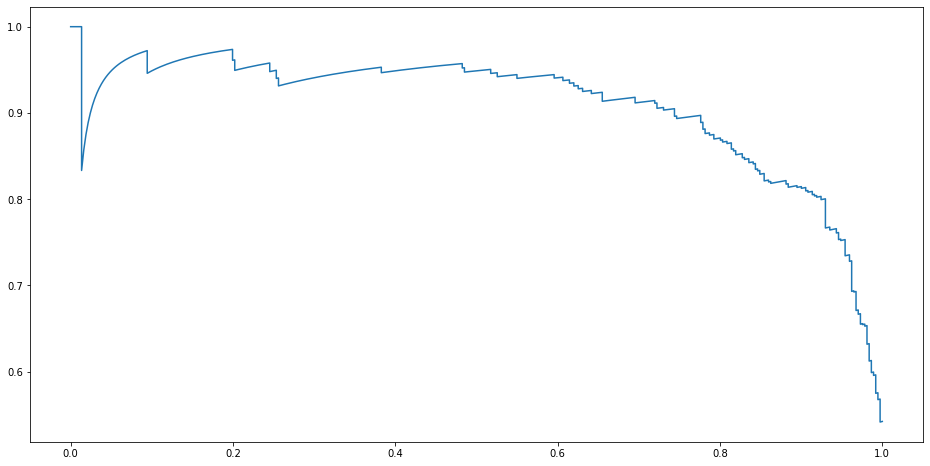

In [20]:
precisions, recalls, _ = precision_recall_curve(y_teste_uni, y_pred_perc)
fprC, tprC, _ = roc_curve(y_teste_uni, y_pred_perc)

plt.rcParams["figure.figsize"] = (16,8)
plt.plot(recalls, precisions)
plt.show()

#Comparação

In [10]:
from joblib import load
from sklearn.metrics import auc

In [11]:
# Carrega os outros modelos
modelo_a = keras.models.load_model('/content/drive/MyDrive/Bolsa/Dados/Modelos/rede_bifurcada_A.h5')
modelo_am1 = keras.models.load_model('/content/drive/MyDrive/Bolsa/Dados/Modelos/rede_bifurcada_AM1.h5')
forest_clf_AM = load('/content/drive/MyDrive/Bolsa/Dados/Modelos/forest_clf_AM.joblib')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [15]:
#   Random Forest AM
X_teste = [np.concatenate([X_g_teste_np[i],X_l_teste_np[i]]) for i in range(len(X_g_teste_np))]

y_probas_forest_AM = forest_clf_AM.predict_proba(X_teste)
y_scores_forest_AM = y_probas_forest_AM[:, 1] # score = probabilidade da classe positiva
precisions_forest_AM, recalls_forest_AM, _ = precision_recall_curve(y_teste, y_scores_forest_AM)
fpr_forest_AM, tpr_forest_AM, _ = roc_curve(y_teste, y_scores_forest_AM)
importancia_AM = forest_clf_AM.feature_importances_

In [16]:
# Rede Neural A
y_probas = modelo_a.predict((X_g_teste_np, X_l_teste_np))
y_scores = y_probas[:,1]

preA, recA, _ = precision_recall_curve(y_teste, y_scores)
fprA, tprA, _ = roc_curve(y_teste, y_scores)

In [17]:
# Rede Neural AM1
y_probas = modelo_am1.predict((X_g_teste_np, X_l_teste_np))
y_scores = y_probas[:,1]

pre, rec, _ = precision_recall_curve(y_teste, y_scores)
fpr, tpr, _ = roc_curve(y_teste, y_scores)

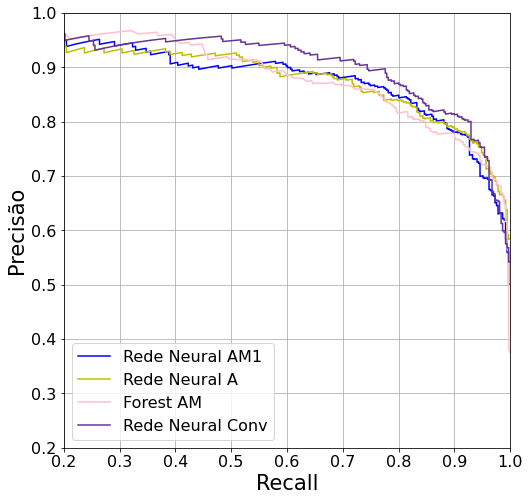

In [23]:
# Plotagem Precisão x Recall

tam = 16

plt.rcParams["figure.figsize"] = (8,8)

cores = ['maroon', 'rebeccapurple', 'y', 'lightsalmon']
leg = ['Rede Neural', 'Rede Neural com Drop', 'Rede Neural A', 'Rede Neural A com Drop']


plt.plot(rec, pre, color='b', label = leg[2] + 'M1')
plt.plot(recA, preA, color=cores[2], label = leg[2])
plt.plot(recalls_forest_AM, precisions_forest_AM, color='pink', label = 'Forest AM')
plt.plot(recalls, precisions, color=cores[1], label = 'Rede Neural Conv')


plt.xlim(left=0.2, right=1)
plt.xlabel('Recall', fontsize = tam+5)
plt.xticks(fontsize = tam)

plt.ylim(bottom=0.2, top=1)
plt.ylabel('Precisão', fontsize = tam+5)
plt.yticks(fontsize = tam)

plt.grid(b=True)
plt.legend(fontsize = tam, markerscale = 2, loc='lower left')

#plt.savefig(salva_figs+'/PxR_basico_A.pdf', bbox_inches = 'tight')
plt.show()

In [22]:
print('AUC FRM:', auc(recalls_forest_AM, precisions_forest_AM))
print('AUC Rede Neural AM1:', auc(rec, pre))
print('AUC Rede Neural A:', auc(recA, preA))
print('AUC Rede Conv:', auc(recalls, precisions))

AUC FRM: 0.8886748570694447
AUC Rede Neural AM1: 0.8798728927539339
AUC Rede Neural A: 0.8770265273106224
AUC Rede Conv: 0.9080941251508814


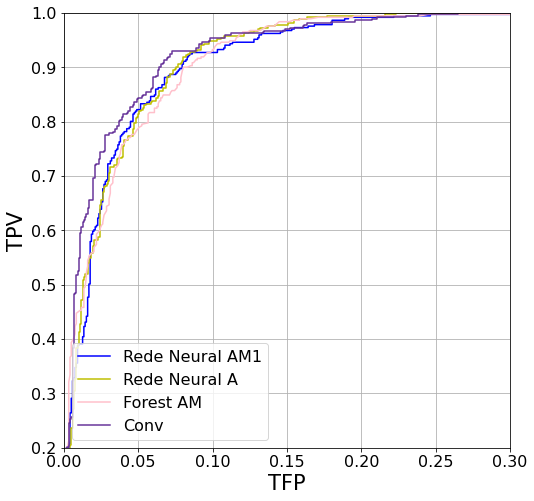

In [27]:
# Plotagem Precisão x Recall

tam = 16

plt.rcParams["figure.figsize"] = (8,8)

cores = ['maroon', 'rebeccapurple', 'y', 'lightsalmon']
leg = ['Rede Neural', 'Rede Neural com Drop', 'Rede Neural A', 'Rede Neural A com Drop']


plt.plot(fpr, tpr, color='b', label = leg[2] + 'M1')
plt.plot(fprA, tprA, color=cores[2], label = leg[2])
plt.plot(fpr_forest_AM, tpr_forest_AM, color='pink', label = 'Forest AM')
plt.plot(fprC, tprC, color=cores[1], label = 'Conv')


plt.xlim(left=0, right=0.3)
plt.xlabel('TFP', fontsize = tam+5)
plt.xticks(fontsize = tam)

plt.ylim(bottom=0.2, top=1)
plt.ylabel('TPV', fontsize = tam+5)
plt.yticks(fontsize = tam)

plt.grid(b=True)
plt.legend(fontsize = tam, markerscale = 2, loc='lower left')

#plt.savefig(salva_figs+'/PxR_basico_A.pdf', bbox_inches = 'tight')
plt.show()

#Novos Casos

In [28]:
# Carrega dados dos novos casos
g_0, l_0 = GA.carrega_add()
X_g_0, X_l_0, y_0 = GA.ajusta_dados(g_0, l_0)
X_g_0_np = np.array(X_g_0)
X_l_0_np = np.array(X_l_0)

Iniciando leitura dos arquivos adicionais de teste.
Arquivos adicionais de teste globais lidos.
Arquivos adicionais de teste locais lidos.


In [29]:
model.predict((X_g_0_np, X_l_0_np))

array([[0.0628466 , 0.9371534 ],
       [0.04889655, 0.95110345],
       [0.11748184, 0.8825182 ],
       [0.12117166, 0.87882835],
       [0.33283108, 0.6671689 ],
       [0.53530234, 0.46469775],
       [0.09761217, 0.9023878 ],
       [0.3936136 , 0.6063864 ],
       [0.8462287 , 0.15377125]], dtype=float32)

In [37]:
#g_bins = [i for i in range(len(X_g_0_np))]

g_bins = np.linspace(0, len(X_g_0_np[0])-1, len(X_g_0_np[0]))
l_bins = np.linspace(0, len(X_l_0_np[0])-1, len(X_l_0_np[0]))

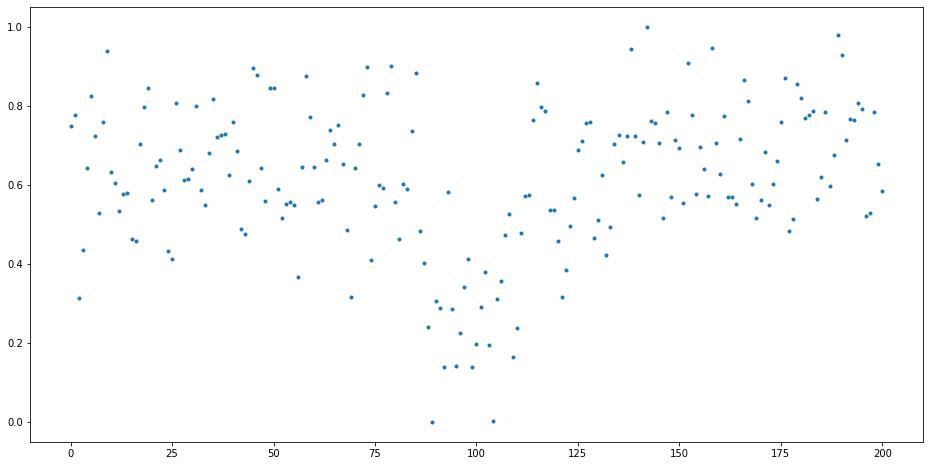

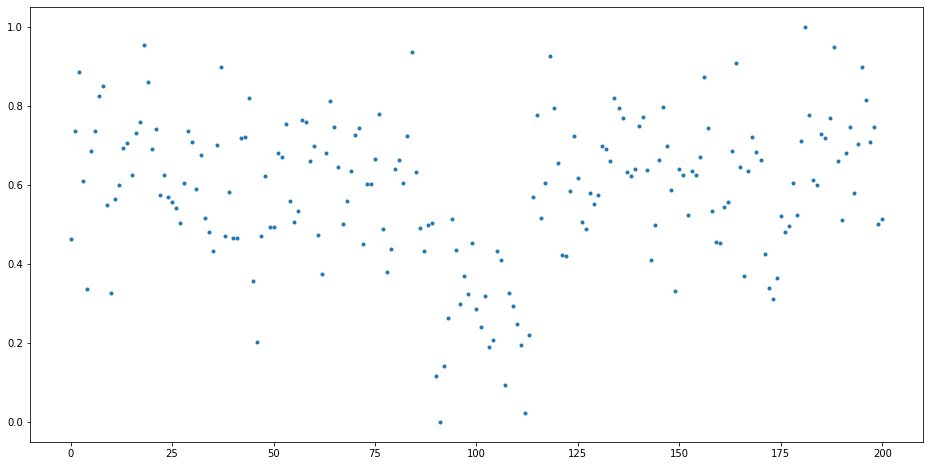

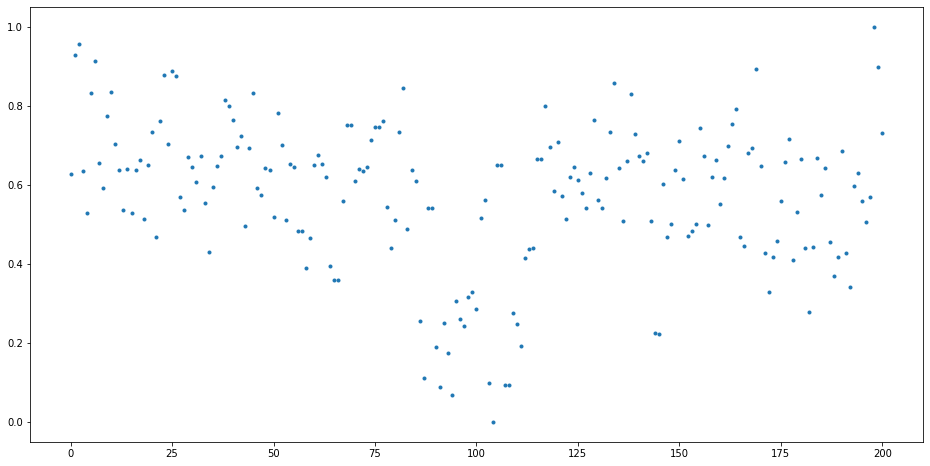

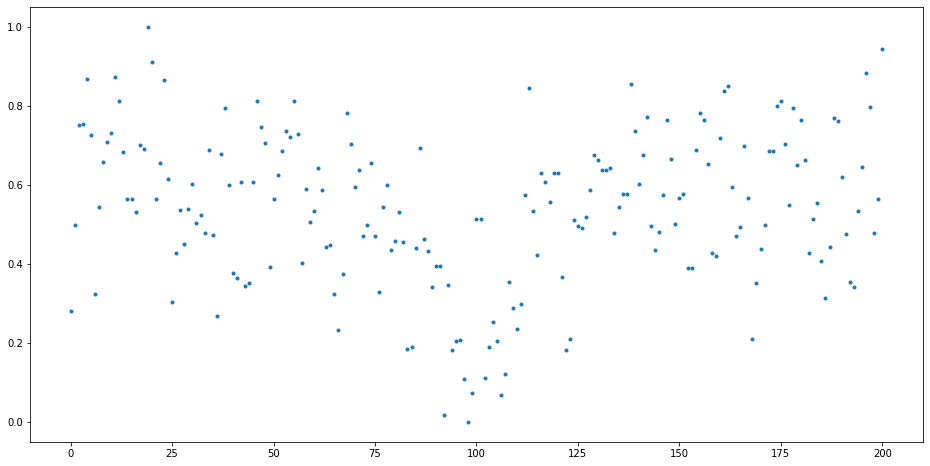

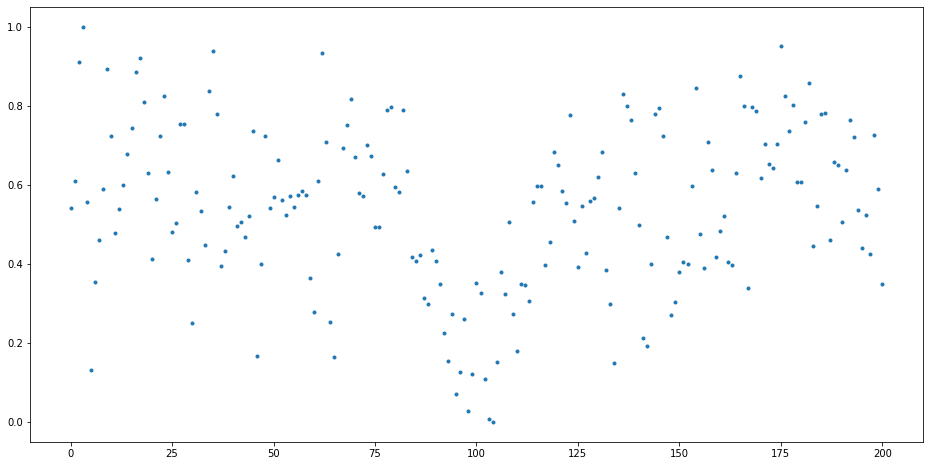

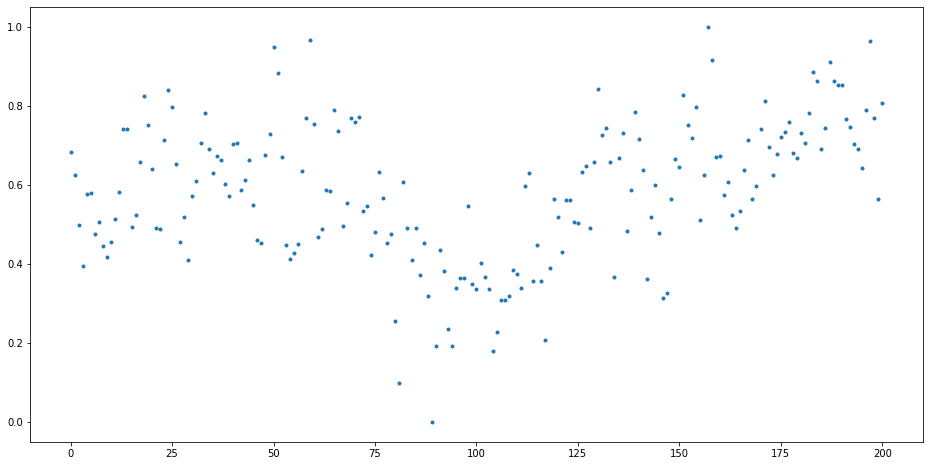

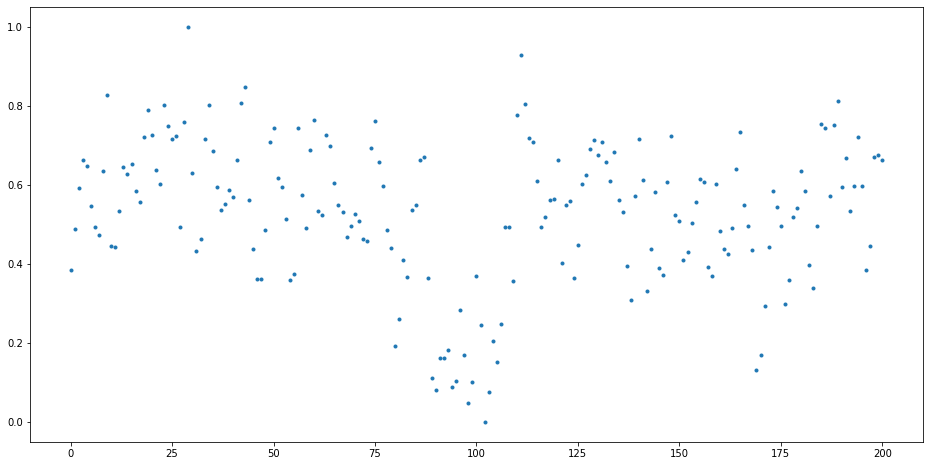

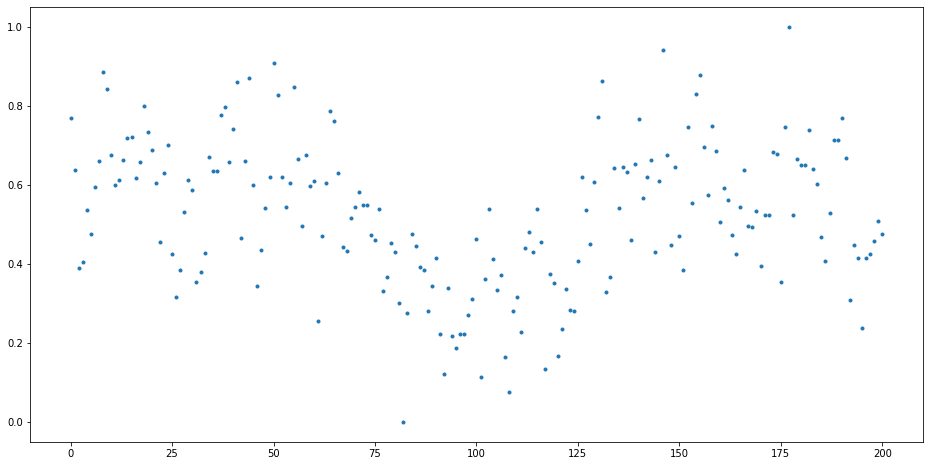

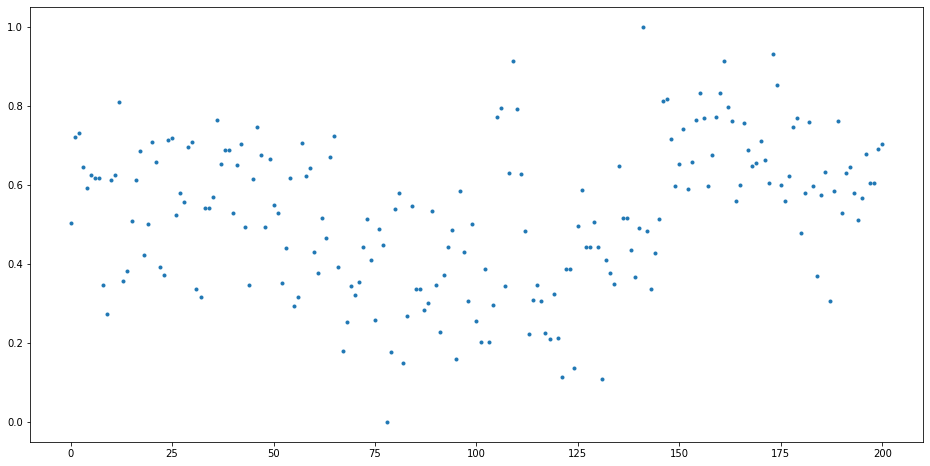

In [41]:
plt.rcParams["figure.figsize"] = (16, 8)

for i in range(len(X_l_0_np)):
  plt.plot(l_bins, X_l_0_np[i], '.')
  plt.show()